In [2]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
mnist


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
x,y=mnist["data"] , mnist["target"]
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

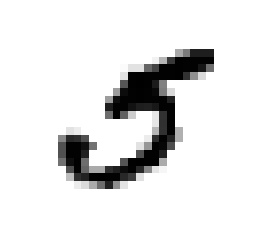

In [19]:
some_digit=x[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
y[36000]

5.0

In [22]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [24]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

In [30]:
#lets stest our predication for one number if uts correct then we will go furthe
#so lets take the train sets as sample
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [42]:
#now we will use the SGDClassifier which is very good for computeuoin large data sets
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(n_iter=5,random_state=42)
#why use random state as 42 its because it will hep to reiterate the data
sgd_clf.fit(x_train,y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [45]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96   ,  0.95915,  0.96785])

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

NameError: name 'x_train' is not defined